In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("mcdonalds.csv")
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female


In [60]:
df.shape

(1453, 15)

In [61]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [62]:
MD = df.iloc[:, 0:11] == 'Yes'
print(MD.mean().round(2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA()
principalComponents = pca.fit(MD)

In [65]:
std_dev = np.sqrt(principalComponents.explained_variance_)

In [66]:
prop_var = principalComponents.explained_variance_ratio_

In [67]:
cum_var = np.cumsum(prop_var)

In [68]:
output = pd.DataFrame({
    'Standard Deviation': np.round(std_dev, 4),
    'Proportion of Variance': np.round(prop_var, 4),
    'Cumulative Proportion': np.round(cum_var, 4)
})

In [69]:
print(output)

    Standard Deviation  Proportion of Variance  Cumulative Proportion
0               0.7570                  0.2994                 0.2994
1               0.6075                  0.1928                 0.4922
2               0.5046                  0.1330                 0.6253
3               0.3988                  0.0831                 0.7084
4               0.3374                  0.0595                 0.7679
5               0.3103                  0.0503                 0.8182
6               0.2897                  0.0438                 0.8620
7               0.2751                  0.0395                 0.9016
8               0.2653                  0.0368                 0.9383
9               0.2488                  0.0324                 0.9707
10              0.2369                  0.0293                 1.0000


In [70]:
load = (principalComponents.components_)

In [71]:
std = np.round(np.sqrt(principalComponents.explained_variance_),1)
rotation = np.round(principalComponents.components_.T, 2)
components = ['PC' + str(i+1) for i in range(rotation.shape[1])]
variables = df.columns[:11]
rotation_df = pd.DataFrame(rotation, index=variables, columns=components)
print(std)
print(rotation_df)

[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]
             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy       0.48 -0.36  0.30  0.06  0.31 -0.17 -0.28 -0.01 -0.57  0.11 -0.05
convenient  0.16 -0.02  0.06 -0.14 -0.28  0.35 -0.06  0.11  0.02  0.67  0.54
spicy       0.01 -0.02  0.04  0.20 -0.07  0.36  0.71 -0.38 -0.40  0.08 -0.14
fattening  -0.12  0.03  0.32 -0.35  0.07  0.41 -0.39 -0.59  0.16  0.01 -0.25
greasy     -0.30  0.06  0.80  0.25 -0.36 -0.21  0.04  0.14  0.00 -0.01 -0.00
fast        0.11  0.09  0.06 -0.10 -0.11  0.59 -0.09  0.63 -0.17 -0.24 -0.34
cheap       0.34  0.61  0.15  0.12  0.13  0.10 -0.04 -0.14 -0.08 -0.43  0.49
tasty       0.47 -0.31  0.29 -0.00  0.21  0.08  0.36  0.07  0.64 -0.08 -0.02
expensive  -0.33 -0.60 -0.02  0.07  0.00  0.26 -0.07 -0.03 -0.07 -0.45  0.49
healthy     0.21 -0.08 -0.19  0.76 -0.29  0.18 -0.35 -0.18  0.19  0.04 -0.16
disgusting -0.37  0.14  0.09  0.37  0.73  0.21 -0.03  0.17  0.07  0.29  0.04


In [72]:
pca = PCA(n_components=2)
MD_pca_transformed = pca.fit_transform(MD)

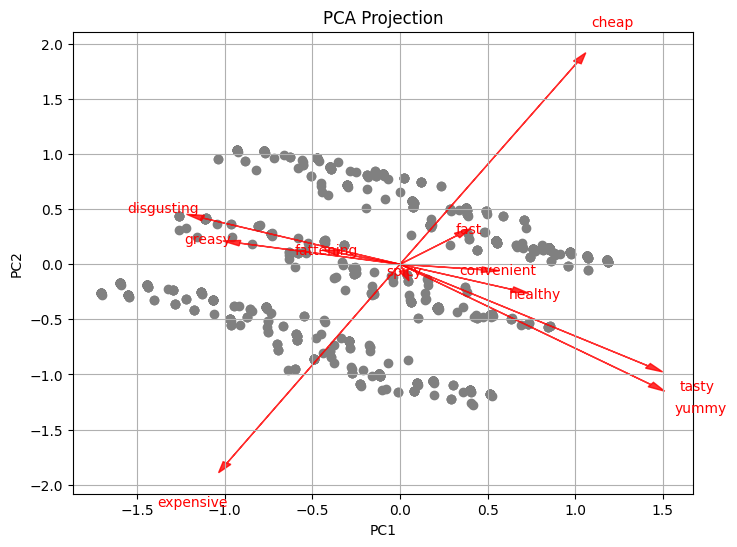

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca_transformed[:, 0], MD_pca_transformed[:, 1], color='grey')
plt.title('PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')

rotation = pca.components_.T
variables = df.columns[:11]

arrow_scale = 3

for i, var in enumerate(variables):
    plt.arrow(0, 0, rotation[i, 0] * arrow_scale, rotation[i, 1] * arrow_scale, color='r', alpha=0.8, head_width=0.05, head_length=0.1)
    plt.text(rotation[i, 0] * arrow_scale * 1.2, rotation[i, 1] * arrow_scale * 1.2, var, color='r', ha='center', va='center')

plt.grid(True)
plt.show()

In [74]:
from sklearn.cluster import KMeans

In [75]:
wcss = []
MD_km28 = {}

for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(MD)
    wcss.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

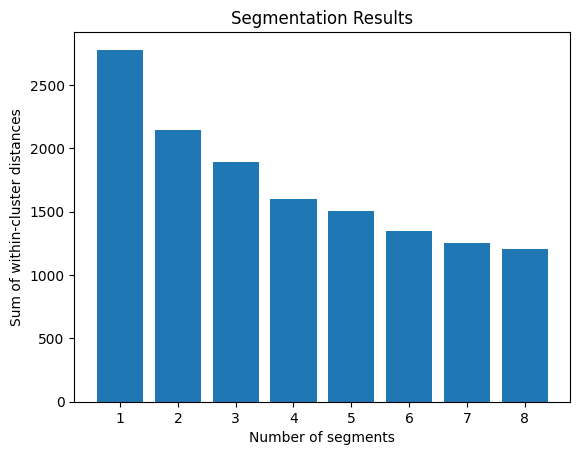

In [76]:
plt.bar(range(1,9), wcss)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

In [77]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

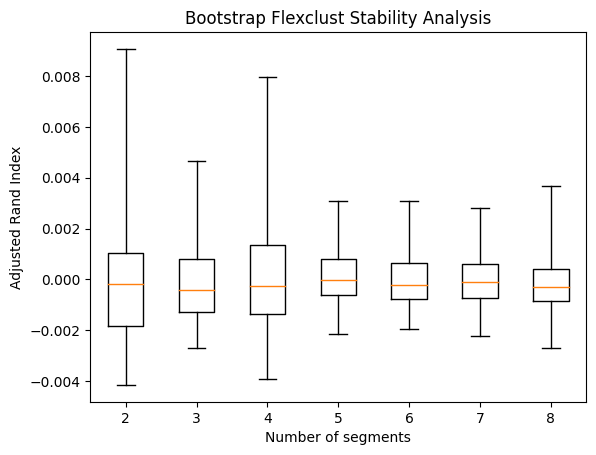

In [78]:
np.random.seed(1234)

n_bootstraps = 100
n_reps = 10

adjusted_rand_index = []
num_segments = range(2, 9)

for k in num_segments:
    kmeans_original = KMeans(n_clusters=k, n_init=n_reps, random_state=1234)
    kmeans_original.fit(MD.values)
    true_labels = kmeans_original.labels_

    stability_scores = []
    for _ in range(n_bootstraps):
        bootstrap_sample = resample(MD.values)

        kmeans_bootstrap = KMeans(n_clusters=k, n_init=n_reps, random_state=1234)
        kmeans_bootstrap.fit(bootstrap_sample)
        cluster_labels = kmeans_bootstrap.labels_

        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)

    adjusted_rand_index.append(stability_scores)

adjusted_rand_index = np.array(adjusted_rand_index).T

plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust Stability Analysis")
plt.show()

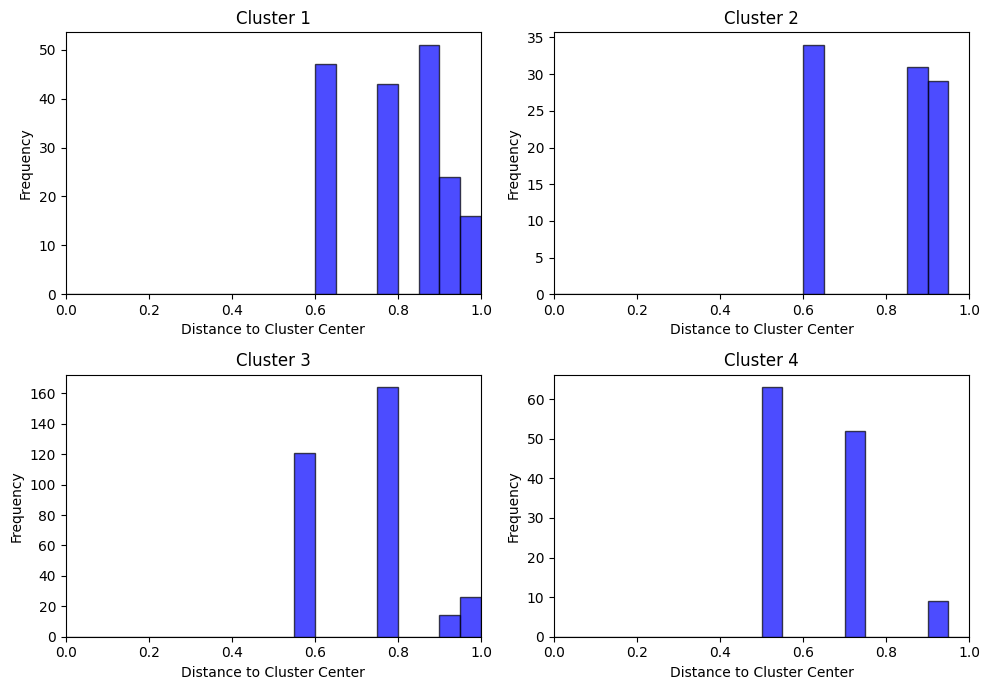

In [79]:
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_4.fit(MD)

labels = kmeans_4.labels_
distances = kmeans_4.transform(MD)

fig, axs = plt.subplots(2, 2, figsize=(10, 7))

for cluster in range(4):
    cluster_data = distances[labels == cluster, cluster]

    axs[cluster // 2, cluster % 2].hist(cluster_data, bins=20, range=(0, 1), color='blue', edgecolor='black', alpha=0.7)
    axs[cluster // 2, cluster % 2].set_title(f"Cluster {cluster+1}")
    axs[cluster // 2, cluster % 2].set_xlim(0, 1)
    axs[cluster // 2, cluster % 2].set_xlabel("Distance to Cluster Center")
    axs[cluster // 2, cluster % 2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [80]:
from matplotlib.sankey import Sankey
import networkx as nx

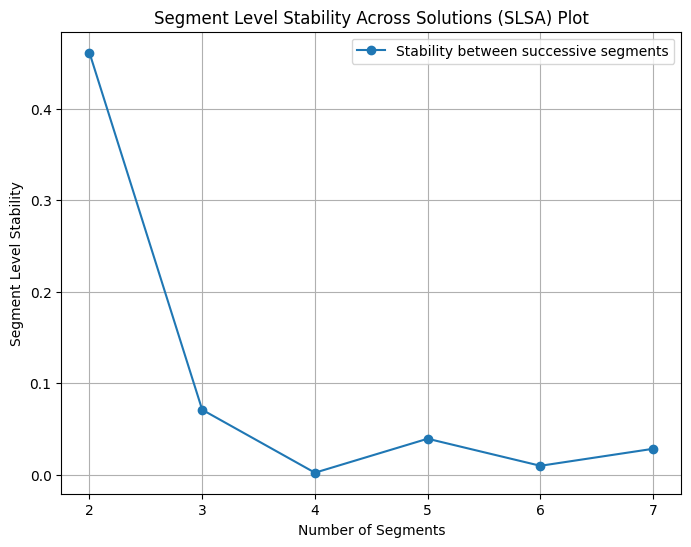

In [81]:
num_segments = range(2, 9)

kmeans_models = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD)
    kmeans_models[k] = kmeans

segment_stability = []

for k in range(2, 8):
    labels_k = kmeans_models[k].labels_
    labels_k1 = kmeans_models[k + 1].labels_

    stability_score = np.mean(labels_k == labels_k1[:len(labels_k)])
    segment_stability.append(stability_score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 8), segment_stability, marker='o', label="Stability between successive segments")

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(range(2, 8))
plt.legend()
plt.grid(True)

plt.show()

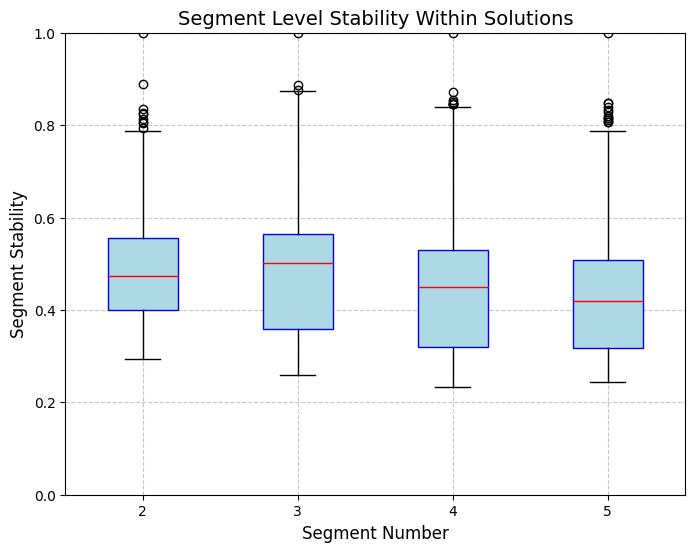

In [82]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD)
    segment_similarities[segment] = MD_km28[segment].transform(MD).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.figure(figsize=(8, 6))
plt.boxplot(segment_stability_values, whis=1.5, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))

plt.xlabel("Segment Number", fontsize=12)
plt.ylabel("Segment Stability", fontsize=12)
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability Within Solutions", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [83]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0    10       True  2   2 -2146.062044  4296.124088  4306.686859  4306.015908
1     5       True  3   3 -1896.330266  3798.660532  3814.504689  3813.529671
2     9       True  4   4 -1603.913802  3215.827604  3236.953147  3235.627738
3     9       True  5   5 -1502.697153  3015.394306  3041.801234  3040.267284
4     7       True  6   6 -1348.665399  2709.330799  2741.019113  2739.277954
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6     9       True  8   8 -1203.646165  2423.292330  2465.543415  2463.533662


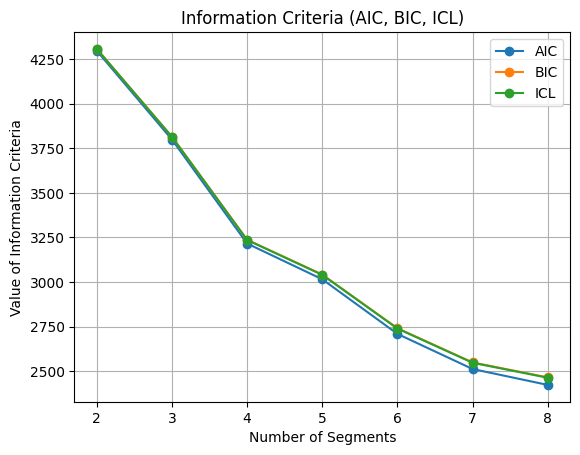

In [84]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [86]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD)
kmeans_clusters = kmeans.predict(MD)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0        546    0    1   33
1          0  213   11    4
2         46    3  265    8
3         29   38    0  256
kmeans   0   1   2   3
kmeans                
0       51  15  35  20
1       18   8  11  11
2       23   9  14  22
3       29   5  15  15


In [87]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD)

log_likelihood_m4a = gmm_m4a.score(MD)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD)

log_likelihood_m4 = gmm_m4.score(MD)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 9.456781748071887
Log-likelihood for MD.m4: 3.6427464011765807


In [89]:
like_counts = pd.value_counts(df['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
1               152
4               160
0               169
2               187
3               229
Name: count, dtype: int64


<ipython-input-89-d40438a43507>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  like_counts = pd.value_counts(df['Like'])


In [90]:
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

df['Like.n'] = df['Like'].map(like_mapping)

like_n_counts = df['Like.n'].value_counts()

sorted_like_n_counts = like_n_counts.sort_index()
print(sorted_like_n_counts)

Like.n
-4.0     71
-3.0     73
-2.0     59
-1.0     58
 0.0    169
 1.0    152
 2.0    187
 3.0    229
 4.0    160
Name: count, dtype: int64


In [93]:
from patsy import dmatrices

independent_vars = df.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=df)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [91]:
from patsy import dmatrix

In [96]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=df)
y = dmatrix('Like', data=df)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


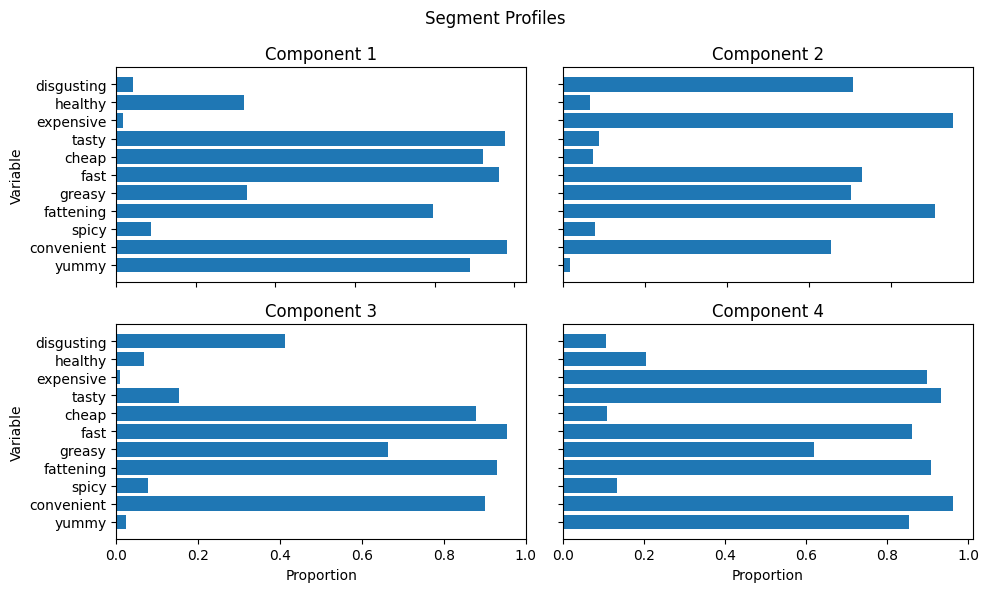

In [97]:
kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

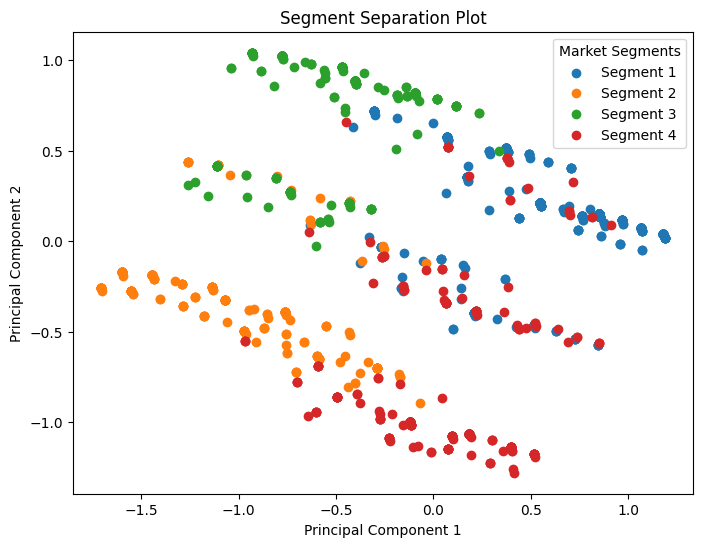

In [99]:
n_segments = 4
gmm = GaussianMixture(n_components=n_segments, random_state=1234)
gmm.fit(MD)
segment_labels = gmm.predict(MD)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD)

plt.figure(figsize=(8, 6))

for segment in range(n_segments):
    plt.scatter(MD_pca[segment_labels == segment, 0],
                MD_pca[segment_labels == segment, 1],
                label=f"Segment {segment + 1}")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Segment Separation Plot")
plt.legend(title="Market Segments")
plt.grid(False)
plt.show()

<Figure size 800x600 with 0 Axes>

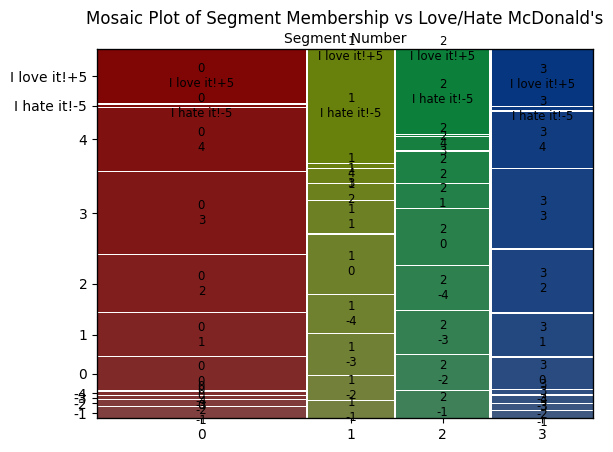

In [102]:
from statsmodels.graphics.mosaicplot import mosaic

n_segments = 4
gmm = GaussianMixture(n_components=n_segments, random_state=1234)
gmm.fit(MD)
segment_labels = gmm.predict(MD)

df['Segment'] = segment_labels

crosstab = pd.crosstab(df['Segment'], df['Like'])

plt.figure(figsize=(8, 6))
mosaic(crosstab.stack())
plt.xlabel('Segment Number')
plt.ylabel('Love/Hate for McDonald\'s')
plt.title('Mosaic Plot of Segment Membership vs Love/Hate McDonald\'s')
plt.show()

In [104]:
import seaborn as sns

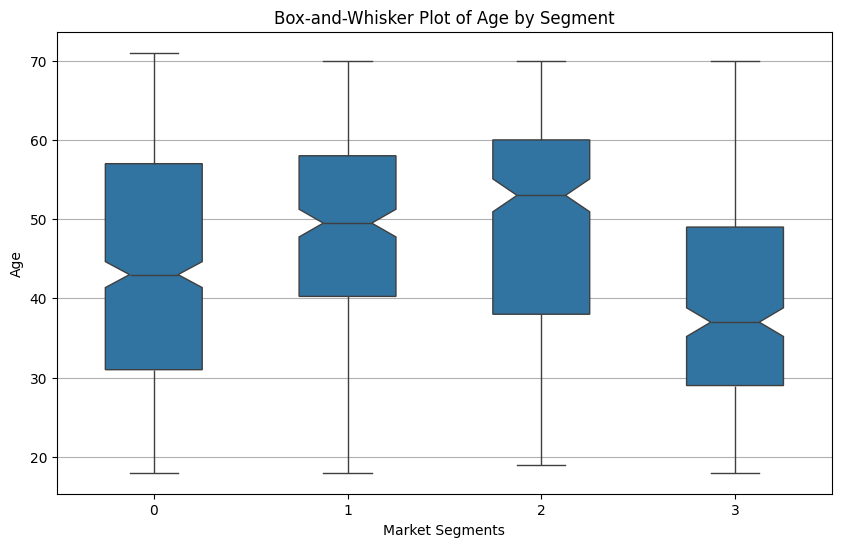

In [105]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Age', data=df, width=0.5, notch=True)

plt.title('Box-and-Whisker Plot of Age by Segment')
plt.xlabel('Market Segments')
plt.ylabel('Age')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [113]:
from sklearn.preprocessing import LabelEncoder

In [115]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('Segment')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,Segment,VisitFrequency
0,0,2.613527
1,1,2.629921
2,2,2.776173
3,3,2.568106


In [116]:
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('Segment')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,Segment,Like
0,0,6.579710
1,1,5.192913
2,2,4.581227
3,3,6.588040


In [117]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('Segment')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,Segment,Gender
0,0,0.396135
1,1,0.606299
2,2,0.415162
3,3,0.498339


In [123]:
import pytest
import numpy as np

@pytest.fixture
def create_data():
    visit = np.array([3.0, 2.5, 4.0, 3.5])
    like = np.array([1.0, -2.0, 2.5, -1.5])
    female = np.array([1, 0, 1, 0])
    return visit, like, female

def test_bubble_size(create_data):
    visit, like, female = create_data
    bubble_sizes = 10 * female
    assert np.all(bubble_sizes == [10, 0, 10, 0]), "Bubble sizes not scaled correctly."

def test_axes_limits():
    xlim = (2, 4.5)
    ylim = (-3, 3)
    assert xlim == (2, 4.5), "X-axis limits incorrect."
    assert ylim == (-3, 3), "Y-axis limits incorrect."

def test_label_placement(create_data):
    visit, like, _ = create_data
    labels = [1, 2, 3, 4]
    for i, label in enumerate(labels):
        assert visit[i] != 0 and like[i] != 0, "Label not placed correctly on the plot."


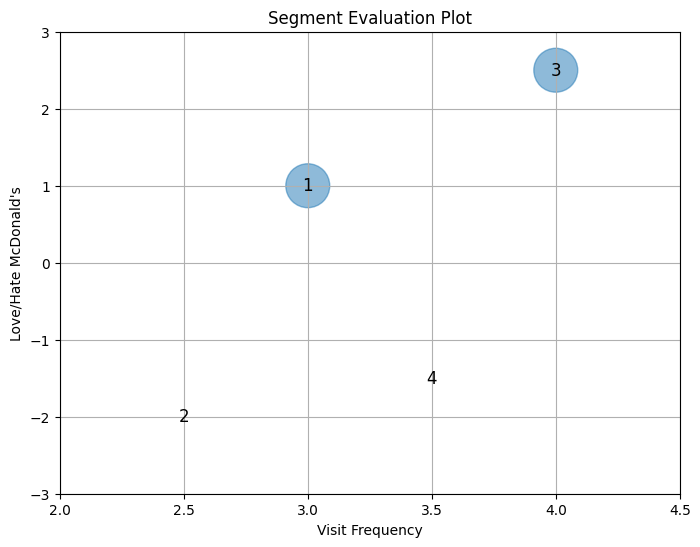

In [124]:
visit = np.array([3.0, 2.5, 4.0, 3.5])
like = np.array([1.0, -2.0, 2.5, -1.5])
female = np.array([1, 0, 1, 0])

plt.figure(figsize=(8, 6))
bubble_sizes = 10 * female

plt.scatter(visit, like, s=bubble_sizes * 100, alpha=0.5)

plt.xlim(2, 4.5)
plt.ylim(-3, 3)

for i, (x, y) in enumerate(zip(visit, like)):
    plt.text(x, y, str(i + 1), fontsize=12, ha='center', va='center')

plt.xlabel("Visit Frequency")
plt.ylabel("Love/Hate McDonald's")

plt.title("Segment Evaluation Plot")
plt.grid(True)
plt.show()
